In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/obesity-classification-dataset/Obesity Classification.csv


In [2]:
df = pd.read_csv('/kaggle/input/obesity-classification-dataset/Obesity Classification.csv')
print(f"Kolom dataset: {df.columns.values}")

Kolom dataset: ['ID' 'Age' 'Gender' 'Height' 'Weight' 'BMI' 'Label']


In [3]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [4]:
df.drop(labels='ID',axis=1,inplace=True) #menghapus fitur yg tidak penting pada df
df

,Age,Gender,Height,Weight,BMI,Label
0,25,Male,175,80,25.3,Normal Weight
1,30,Female,160,60,22.5,Normal Weight
2,35,Male,180,90,27.3,Overweight
3,40,Female,150,50,20.0,Underweight
4,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...
103,11,Male,175,10,3.9,Underweight
104,16,Female,160,10,3.9,Underweight
105,21,Male,180,15,5.6,Underweight
106,26,Female,150,15,5.6,Underweight


In [5]:
df.dtypes

Age         int64
Gender     object
Height      int64
Weight      int64
BMI       float64
Label      object
dtype: object

In [6]:
from sklearn.preprocessing import LabelEncoder #mengubah gender dari object/string menjadi bentuk numerik agar dapat digunakan
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Gender']

0      1
1      0
2      1
3      0
4      1
      ..
103    1
104    0
105    1
106    0
107    1
Name: Gender, Length: 108, dtype: int64

In [7]:
df.isnull().sum() #mencari data kosong

Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

In [8]:
df.isna().sum() #mencari NaN

Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

In [9]:
df.describe()

,Age,Gender,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,46.555556,0.518519,166.574074,59.490741,20.549074
std,24.720620,0.501986,27.873615,28.856233,7.583818
min,11.000000,0.000000,120.000000,10.000000,3.900000
25%,27.000000,0.000000,140.000000,35.000000,16.700000
50%,42.500000,1.000000,175.000000,55.000000,21.200000
75%,59.250000,1.000000,190.000000,85.000000,26.100000
max,112.000000,1.000000,210.000000,120.000000,37.200000


In [10]:
df.shape

(108, 6)

In [11]:
print(f"Label: {df['Label'].unique()}") #melihat banyak label atau kelas

Label: ['Normal Weight' 'Overweight' 'Underweight' 'Obese']


In [12]:
from sklearn.model_selection import train_test_split
feature = df.drop('Label',axis=1)
label = df['Label']

X_train, X_test, y_train, y_test = train_test_split(feature, label, random_state=0)

In [13]:
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (81, 5)
X_test: (27, 5)
y_train: (81,)
y_test: (27,)


In [14]:
!pip install -q mglearn #install mglearn

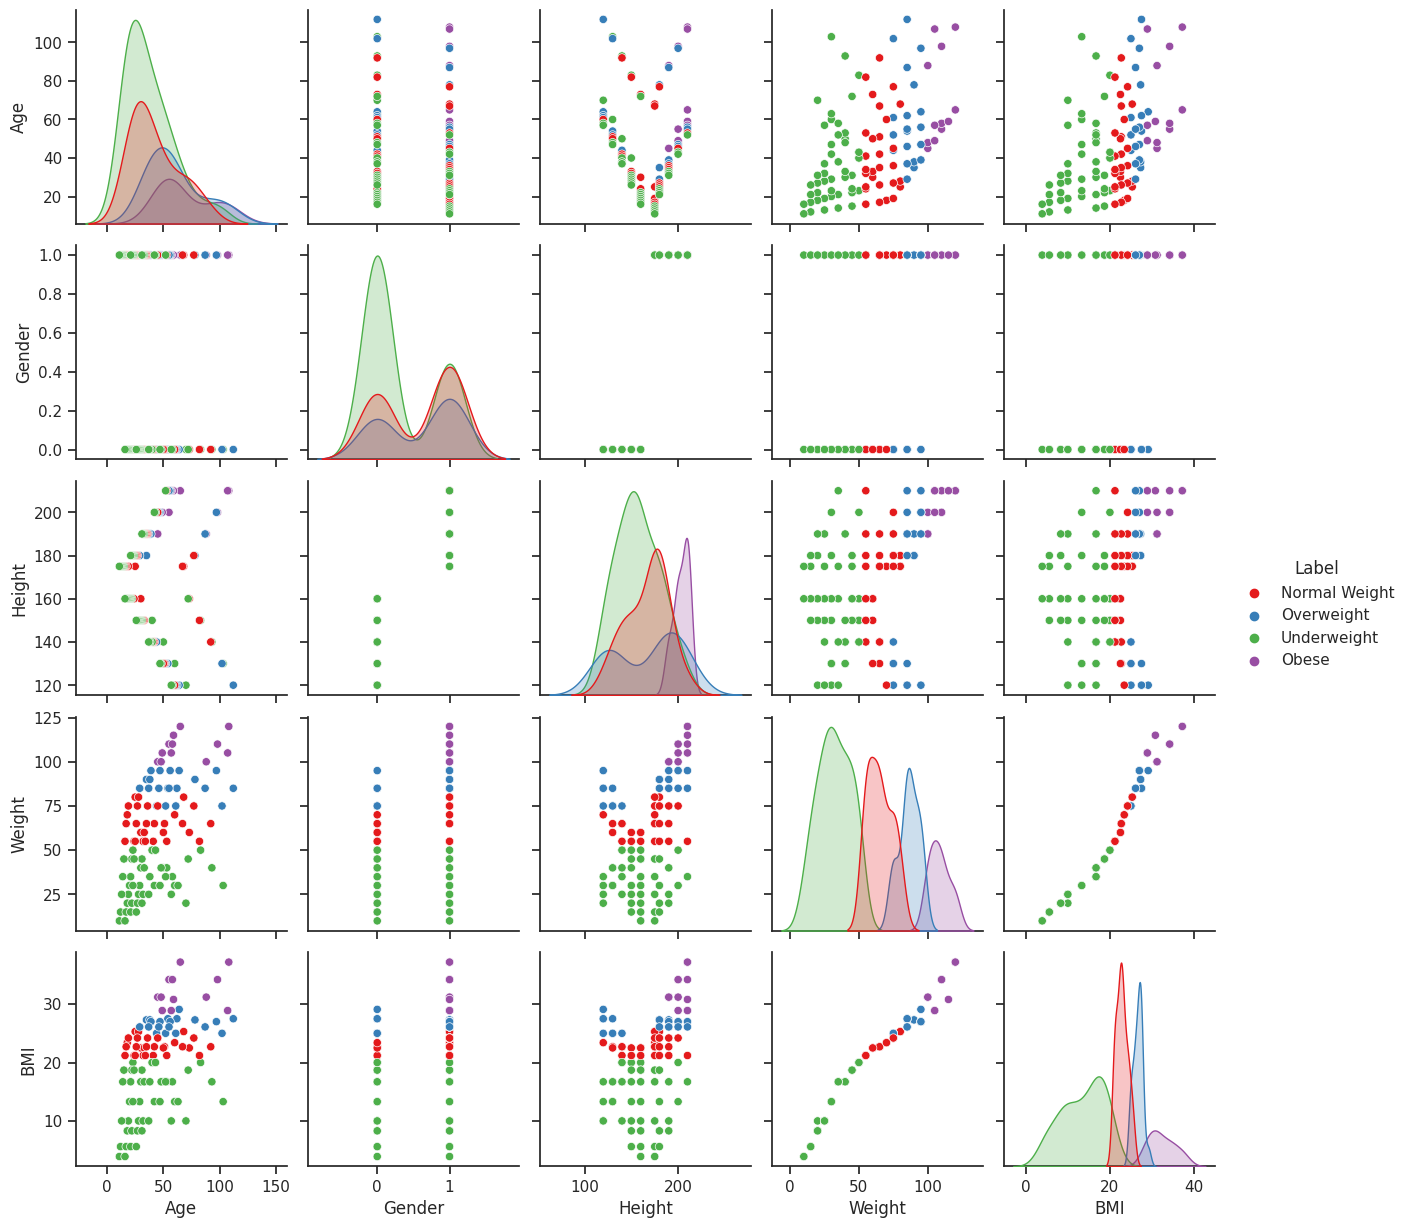

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gunakan seaborn untuk membuat plot sebarplot
sns.set(style="ticks")
sns.pairplot(df, hue='Label', palette='Set1')
plt.show()

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [56]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [57]:
y_pred = knn.predict(X_test)
print(f"Test set score (mean) : {np.mean(y_pred == y_test):.0%}")
print(f"Test set score (score) : {knn.score(X_test, y_test):.0%}")

Test set score (mean) : 74%
Test set score (score) : 74%
